In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

# # Set a seed for reproducibility
# np.random.seed(0)

# # Number of observations
# n = 1000

# # Generate independent variables
# X1 = np.ones(n)
# X1 = np.random.uniform(0, 1, n)
# X2 = np.random.uniform(0, 1, n)
# X3 = np.random.uniform(0, 1, n)

# # Define the true relationship between variables and the target

# bias, w1, w2, w3 = 1, 2, -3, 4


# Y = bias + (w1 * X1) + (w2 * X2) + (w3 * X3)

# # Create dataframe
# df = pd.DataFrame({
#     'X1': X1,
#     'X2': X2,
#     'X3': X3,
#     'Y': Y
# })


# # Define the file path
# file_path = 'synthetic_data.csv'

# # Export the dataframe as a CSV file
# df.to_csv(file_path, index=False)


In [3]:
df = pd.read_csv('synthetic_data.csv')

y = df["Y"].to_numpy().reshape(-1,1)
X = df.drop(columns="Y")

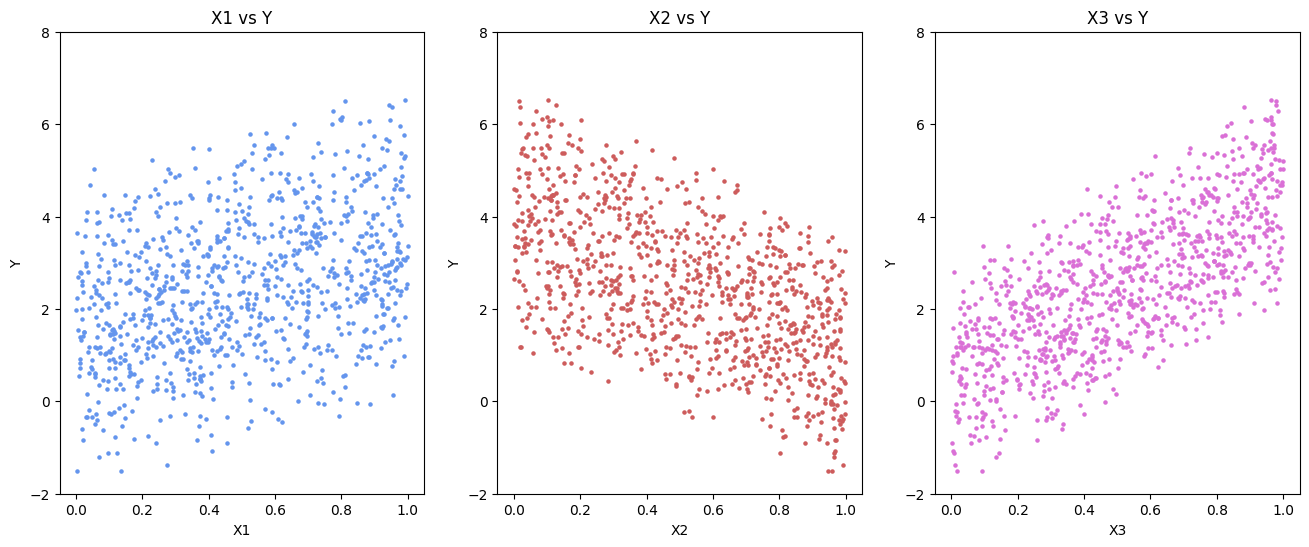

In [4]:
fig, axs = plt.subplots(1, X.shape[1], figsize=(16, 6))

colors = ['cornflowerblue', 'indianred', 'orchid']

columns = X.columns

for index,column in enumerate(columns):
    color = colors[index % len(colors)]
    axs[index].scatter(X[column], y, s = 5, color=color)
    axs[index].set_xlabel(column)
    axs[index].set_ylabel("Y")
    axs[index].set_ylim(-2,8)
    axs[index].set_title(f"{column} vs Y")

In [5]:
# Create a column of ones that matches the number of rows in X
ones = np.ones((np.shape(X)[0], 1))

# Concatenate the column of ones to the front of matrix X
X = np.c_[ones, X]

X[0:3]

array([[1.        , 0.5488135 , 0.59288027, 0.81151847],
       [1.        , 0.71518937, 0.0100637 , 0.47608399],
       [1.        , 0.60276338, 0.4758262 , 0.52315599]])

In [6]:
weights = np.random.rand(X.shape[1]).reshape(-1,1)

weights

array([[0.7111101 ],
       [0.07242125],
       [0.19617639],
       [0.67160317]])

In [7]:
# Hypothetical function to calculate the model's predictions
def predict(X, weights):
    return np.dot(X, weights)


In [8]:
# Function to compute the cost (Mean Squared Error)
def compute_cost(X, y, weights):
    predictions = predict(X, weights)
    errors = predictions - y
    cost = np.mean(errors ** 2) / 2
    return cost

# Function to compute the gradient of the cost function
def compute_gradient(X, y, weights):
    predictions = predict(X, weights)
    errors = predictions - y
    gradient = np.dot(X.T, errors) / len(y)
    return gradient

# Gradient Descent function to minimize the cost function
def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights = weights - learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        
        # Print the cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    
    return weights, cost_history

# Initialize parameters
learning_rate = 0.0003
iterations = 1000000

# Run Gradient Descent
final_weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

print(final_weights)


Iteration 0: Cost 1.870751724195131
Iteration 100: Cost 1.7770329178032347
Iteration 200: Cost 1.6924213152556884
Iteration 300: Cost 1.6159865193855292
Iteration 400: Cost 1.54689342511565
Iteration 500: Cost 1.4843924583268553
Iteration 600: Cost 1.427810814602134
Iteration 700: Cost 1.3765445954253492
Iteration 800: Cost 1.3300517499040567
Iteration 900: Cost 1.2878457395030032
Iteration 1000: Cost 1.2494898517270872
Iteration 1100: Cost 1.2145920962789651
Iteration 1200: Cost 1.1828006240258202
Iteration 1300: Cost 1.153799615221612
Iteration 1400: Cost 1.1273055889168468
Iteration 1500: Cost 1.1030640904117615
Iteration 1600: Cost 1.0808467180282264
Iteration 1700: Cost 1.0604484544424357
Iteration 1800: Cost 1.0416852713808622
Iteration 1900: Cost 1.0243919796776364
Iteration 2000: Cost 1.0084202995599005
Iteration 2100: Cost 0.9936371286021825
Iteration 2200: Cost 0.9799229871016785
Iteration 2300: Cost 0.9671706227004183
Iteration 2400: Cost 0.9552837579419448
Iteration 2500: C